# Project: Seattle Airbnb

> For this project, you will pick a dataset. Inspired by Robert, there are a few public datasets from AirBnB available below, but you may also choose a dataset similar to what was used in the lessons, or an entirely different dataset. Using your dataset, you will choose 3 questions you aspire to answer from the data.

I chose Airbnb data in Seattle, and have the following three questions:

- What is the seasonal pattern of Airbnb in Seattle?

- What kinds of airbnb homes are popular?

- What are the most influencial features about the rental price?

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
cal = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/calendar.csv')
lst = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/listings.csv')
rev = pd.read_csv('D:/OneDrive/Study/MOOC/Udacity/Data_Scientist/DSND_Term2/04Seattle_Airbnb/data/reviews.csv')

## Data understanding

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [5]:
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [7]:
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


## Seasonal pattern 

What is the seasonal pattern of Airbnb in Seattle?

In [9]:
# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

In [10]:
# define a function to plot daily data
def timeplot(data, feat, title):
    
    plt.figure(figsize=(20,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(title)
    
    plt.plot(x, y_smooth, 'c-')
    plt.show()

### Seasonal Booking

In [11]:
cal['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [12]:
# convert 'available' into binary
cal['available'] = cal['available'].map(lambda available: 1 if available == 't' else 0)

In [13]:
# check
cal['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [14]:
ocp = cal[['date', 'available']].groupby('date').mean()
ocp['occupancy'] = 1 - ocp['available']

In [15]:
ocp.head()

,available,occupancy
date,,
2016-01-04,0.454426,0.545574
2016-01-05,0.488999,0.511001
2016-01-06,0.478261,0.521739
2016-01-07,0.465165,0.534835
2016-01-08,0.466737,0.533263


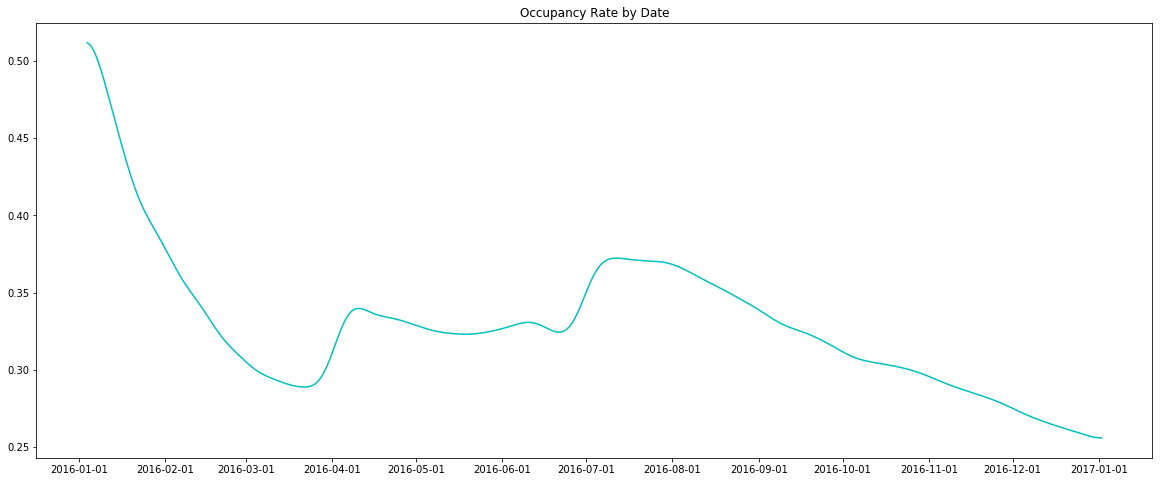

In [16]:
timeplot(ocp, 'occupancy', 'Occupancy Rate by Date')

The highest occupancy rate is in January 2016, and decreasing rapidly from 50% to 30% in 2 months. Then, it goes up slightly in the start of April and in the start of July seprately. After that, it declines continously.

It seems that spring and summer are the busy season. The best weather in Seattle is from late June to early September. And, in fact, there is a peak during that time.

However, it is weired to see the ighest occupancy rate is in January 2016. It might be becuase any festivals. Or did the hotels change their price strategy to become more competive? I don't know why.

### Seasonal Rental Price

In [17]:
# convert 'price' into float
cal['price'] = cal['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

#### Median of Price

In [18]:
pri_median = cal[['date', 'price']].groupby('date').median()

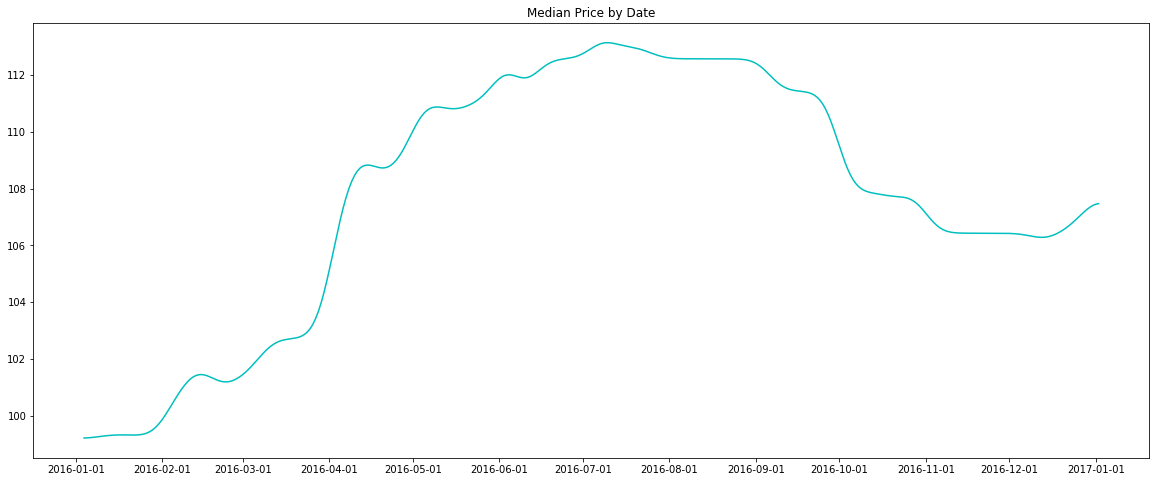

In [19]:
timeplot(pri_median, 'price', 'Median Price by Date')

Obviously, the rental price are higher from May to September. In that time, Seattle usually have nice weather. It makes sense that rental price in Rainy Day is cheaper.

In addition, the cheapest price is in in January 2016. It could be a reason for high occupancy, but I don't think it is enough to explain 50% occupancy rate in January.

#### Mean of Price

I belieave the median of price shows the pattern of price better than mean, but it is ok to take a look at the mean.

In [20]:
pri_mean = cal[['date', 'price']].groupby('date').mean()

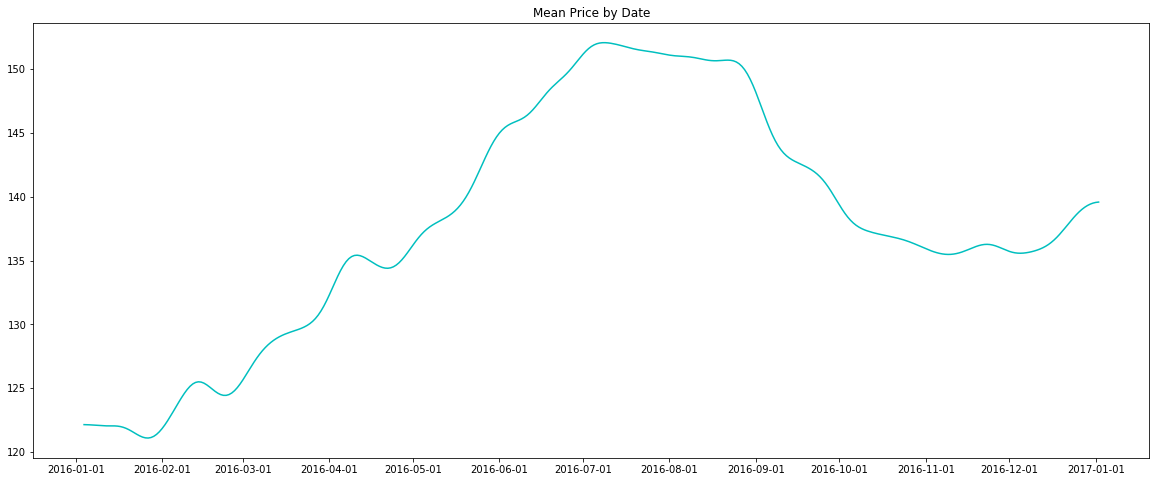

In [21]:
timeplot(pri_mean, 'price', 'Mean Price by Date')

It looks likes a little bit diffrence, but it still shows the same pattern.

## Popular Airbnb Homes

In [22]:
ocp = cal[['listing_id', 'available']].groupby('listing_id').mean()
ocp['occupancy'] = 1 - ocp['available']
ocp.drop(['available'], axis = 1, inplace=True)
ocp['id'] = ocp.index

In [23]:
ocp.head()

,occupancy,id
listing_id,,
3335,0.153425,3335
4291,0.000000,4291
5682,0.153425,5682
6606,0.000000,6606
7369,0.854795,7369


In [24]:
ocp.describe()

,occupancy,id
count,3818.000000,3.818000e+03
mean,0.329390,5.550111e+06
std,0.347322,2.962660e+06
min,0.000000,3.335000e+03
25%,0.013699,3.258256e+06
50%,0.156164,6.118244e+06
75%,0.660274,8.035127e+06
max,1.000000,1.034016e+07


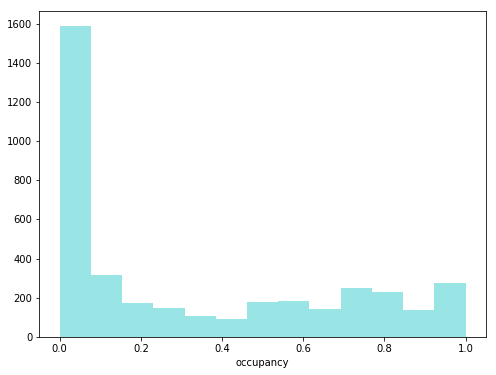

In [25]:
plt.figure(figsize=(8,6))
sns.distplot(ocp['occupancy'], color='c', kde=False)
plt.show()

Let's define the Airbnb rooms whose occupancy rates are greater than or qeual to 70% are popular. 

In [26]:
threshold = 0.70

In [27]:
# join tables
data = pd.merge(ocp, lst, how='inner', left_on='id', right_on='id')

In [28]:
data.head()

,occupancy,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,0.153425,3335,https://www.airbnb.com/rooms/3335,20160104002432,2016-01-04,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,...,NaN,f,NaN,WASHINGTON,f,strict,f,f,4,NaN
1,0.000000,4291,https://www.airbnb.com/rooms/4291,20160104002432,2016-01-04,Sunrise in Seattle Master Suite,NaN,"Located in Seattle, this is a spacious, clean...","Located in Seattle, this is a spacious, clean...",none,...,9.0,f,NaN,WASHINGTON,f,moderate,f,f,5,1.14
2,0.153425,5682,https://www.airbnb.com/rooms/5682,20160104002432,2016-01-04,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,...,10.0,f,NaN,WASHINGTON,t,strict,f,t,1,4.21
3,0.000000,6606,https://www.airbnb.com/rooms/6606,20160104002432,2016-01-04,"Fab, private seattle urban cottage!",NaN,"Soo centrally located, this is a little house ...","Soo centrally located, this is a little house ...",none,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.66
4,0.854795,7369,https://www.airbnb.com/rooms/7369,20160104002432,2016-01-04,launchingpad/landingpad,contemporary condo on the western edge of pike...,spacious condo with all the amenities,contemporary condo on the western edge of pike...,none,...,9.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.50


In [29]:
# define a plot function to compare feature of popular and unpopular homes
def comparePlot(feat):
    
    plt.figure(figsize=(8,6))
        
    if data[feat].dtype != np.float:
        cnt_popular = data[data['occupancy'] >= threshold][feat].value_counts()
        cnt_unpopular = data[data['occupancy'] < threshold][feat].value_counts()
        fre_popular = pd.DataFrame(cnt_popular / sum(cnt_popular))
        fre_popular['popularity'] = 'Popular'
        fre_popular['index'] = fre_popular.index
        fre_unpopular = pd.DataFrame(cnt_unpopular / sum(cnt_unpopular))
        fre_unpopular['popularity'] = 'Unpopular'
        fre_unpopular['index'] = fre_unpopular.index
        
        plot_data = pd.concat([fre_popular, fre_unpopular], ignore_index=True)
        sns.barplot(x='index', y=feat, hue='popularity', data=plot_data, palette='GnBu')
        plt.xticks(rotation='vertical')
        plt.legend(loc=1)
    
    else:
        sns.kdeplot(data[feat][data['occupancy'] >= threshold], color='m')
        sns.kdeplot(data[feat][data['occupancy'] < threshold], color='c')
        plt.legend(['Popular', 'Unpopular'], loc=1)
    
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    
    plt.show()

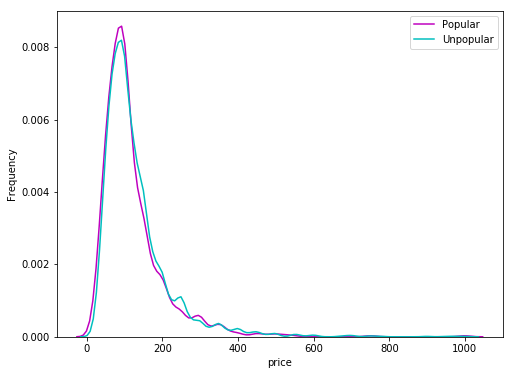

In [30]:
# price
data['price'] = data['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')
comparePlot('price')

In general, the popular rooms have slightly cheaper price. It is commomsense that people always want to pay less.

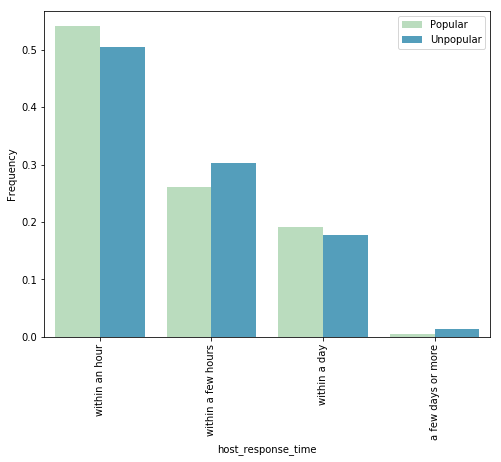

In [31]:
# host response time
comparePlot('host_response_time')

If host can respond soon, they will have more oppotunity to rent.

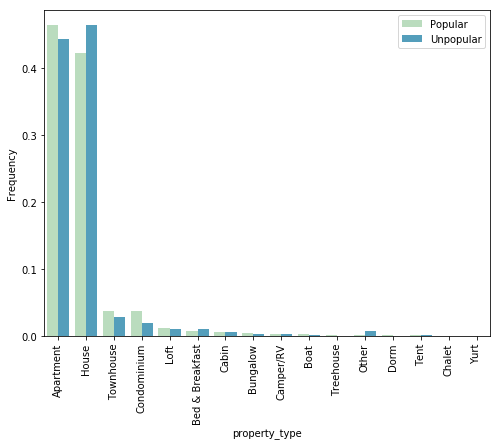

In [32]:
# property type
comparePlot('property_type')

We can see that houses are more unpopular.

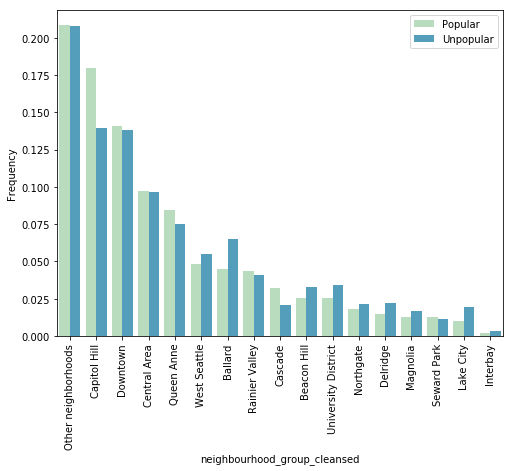

In [33]:
# neighbourhood
comparePlot('neighbourhood_group_cleansed')

Capital Hill is very popular.

Wikipedia says:

> Capitol Hill is a densely populated, residential district in Seattle, Washington, United States. It is one of the city's most prominent nightlife and entertainment districts and is the center of the city's LGBT and counterculture communities.

There is an interesting thing that the Ballard is significantly unpopular.

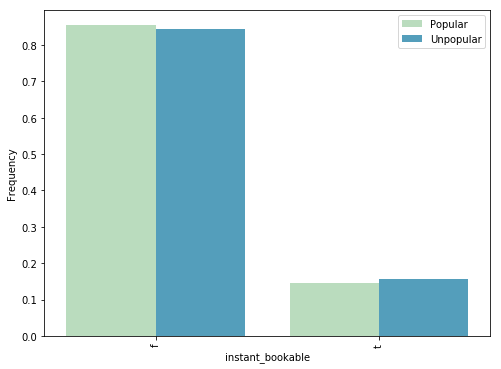

In [34]:
# booking
comparePlot('instant_bookable')

Whether the rooms can be booked instantly does not matter.

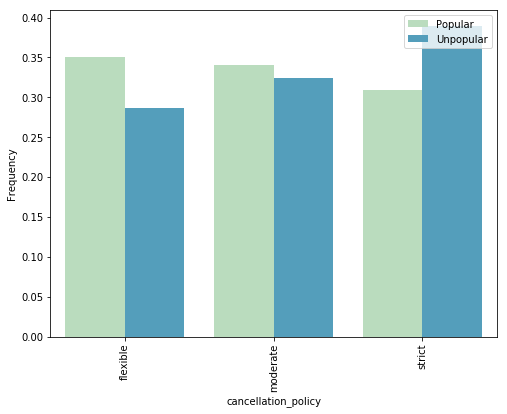

In [35]:
# cancellation policy
comparePlot('cancellation_policy')

More felxiable cancellation policy, more popular.

## Influencial Features

### Data Processing 

In [36]:
lst.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

#### Step 01: Dropping Useless Features

In [37]:
def drop(data, feat):
    new_data = data.drop(feat, axis=1)
    print('Dropping {}...'.format(feat))
    return new_data

In [38]:
# drop id
data_clean = drop(lst, 'id')
data_clean = drop(data_clean, 'scrape_id')
data_clean = drop(data_clean, 'host_id')
data_clean = drop(data_clean, 'first_review')
data_clean = drop(data_clean, 'last_review')

for feat in data.columns:
    # drop url
    if 'url' in feat:
        data_clean = drop(data_clean, feat)
    # drop name
    if 'name' in feat:
        data_clean = drop(data_clean, feat)
        


Dropping id...
Dropping scrape_id...
Dropping host_id...
Dropping first_review...
Dropping last_review...
Dropping listing_url...
Dropping name...
Dropping thumbnail_url...
Dropping medium_url...
Dropping picture_url...
Dropping xl_picture_url...
Dropping host_url...
Dropping host_name...
Dropping host_thumbnail_url...
Dropping host_picture_url...
Dropping jurisdiction_names...


In [39]:
# drop words
data_clean = drop(data_clean, 'summary')
data_clean = drop(data_clean, 'space')
data_clean = drop(data_clean, 'description')
data_clean = drop(data_clean, 'neighborhood_overview')
data_clean = drop(data_clean, 'notes')
data_clean = drop(data_clean, 'transit')
data_clean = drop(data_clean, 'host_about')

Dropping summary...
Dropping space...
Dropping description...
Dropping neighborhood_overview...
Dropping notes...
Dropping transit...
Dropping host_about...


In [40]:
# drop identical features
for feat in data_clean.columns:
    if len(data_clean[feat].value_counts()) <= 1:
        data_clean = drop(data_clean, feat)

Dropping last_scraped...
Dropping experiences_offered...
Dropping market...
Dropping country_code...
Dropping country...
Dropping has_availability...
Dropping calendar_last_scraped...
Dropping requires_license...
Dropping license...


In [41]:
data_clean['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
seattle                     1
Phinney Ridge Seattle       1
西雅图                         1
Ballard, Seattle            1
Name: city, dtype: int64

In [42]:
data_clean['state'].value_counts()

WA    3817
wa       1
Name: state, dtype: int64

In [43]:
data_clean['smart_location'].value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
西雅图, WA                         1
Phinney Ridge Seattle, WA       1
Ballard, Seattle, WA            1
seattle, wa                     1
Name: smart_location, dtype: int64

Of course, all of them are in Seattle, WA

In [44]:
data_clean = drop(data_clean, 'city')
data_clean = drop(data_clean, 'state')
data_clean = drop(data_clean, 'smart_location')

Dropping city...
Dropping state...
Dropping smart_location...


In [45]:
# only need 'neighbourhood_group_cleansed' as feature of home location
data_clean = drop(data_clean, 'street')
data_clean = drop(data_clean, 'neighbourhood')
data_clean = drop(data_clean, 'neighbourhood_cleansed')
data_clean = drop(data_clean, 'zipcode')
data_clean = drop(data_clean, 'latitude')
data_clean = drop(data_clean, 'longitude')

Dropping street...
Dropping neighbourhood...
Dropping neighbourhood_cleansed...
Dropping zipcode...
Dropping latitude...
Dropping longitude...


In [46]:
# for price, only keep price as label
data_clean = drop(data_clean, 'weekly_price')
data_clean = drop(data_clean, 'monthly_price')
data_clean = drop(data_clean, 'security_deposit')
data_clean = drop(data_clean, 'cleaning_fee')

Dropping weekly_price...
Dropping monthly_price...
Dropping security_deposit...
Dropping cleaning_fee...


In [47]:
# for listing count, only keep the calculated one
data_clean = drop(data_clean, 'host_listings_count')
data_clean = drop(data_clean, 'host_total_listings_count')

Dropping host_listings_count...
Dropping host_total_listings_count...


In [48]:
# keep only anual avaliability
data_clean = drop(data_clean, 'availability_30')
data_clean = drop(data_clean, 'availability_60')
data_clean = drop(data_clean, 'availability_90')

Dropping availability_30...
Dropping availability_60...
Dropping availability_90...


#### Step 02: Assess Missing Data

In [49]:
# investigate missing data in columns
NaN_rate_col = data_clean.isnull().sum().sort_values(ascending=False) / len(data_clean)

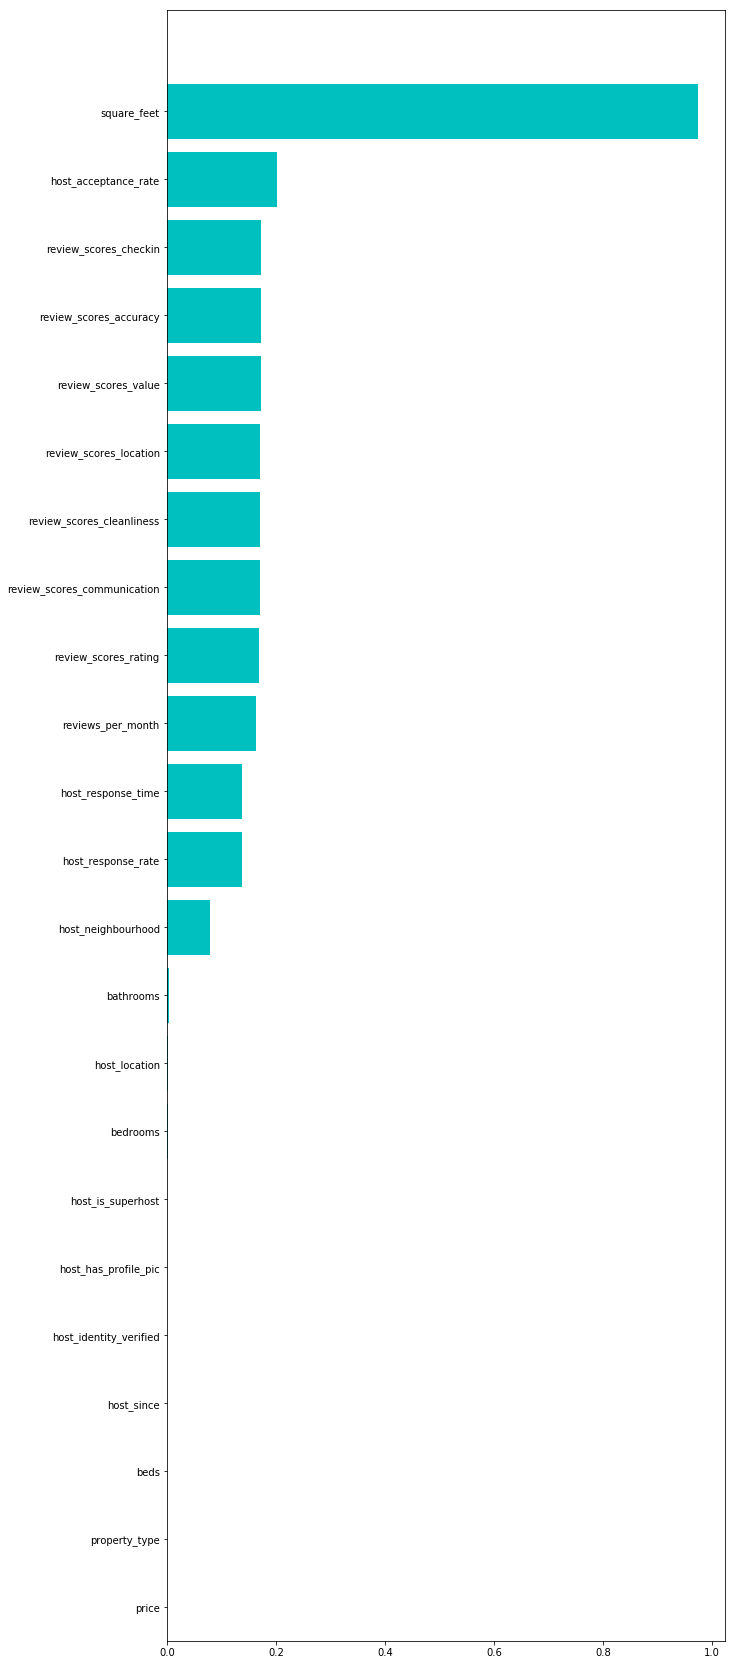

In [50]:
x = range(len(NaN_rate_col[NaN_rate_col != 0]))
y = NaN_rate_col[NaN_rate_col != 0]

plt.figure(figsize=(10,30))
ax = plt.subplot()

plt.gca().invert_yaxis()
ax.set_yticks(range(len(NaN_rate_col)))
ax.set_yticklabels(NaN_rate_col.index)

plt.barh(x, y, color='c')
plt.show()

In [51]:
# no missing label here
data_clean['price'].isnull().sum()

0

In [52]:
# drop the feature whose missing portion are greater than 50%
for feat in NaN_rate_col.index:
    if NaN_rate_col[feat] > 0.5:
        data_clean = drop(data_clean, feat)

Dropping square_feet...


In [53]:
# investigate missing data in rows
data_clean['Missing_num'] = data_clean.isnull().sum(axis=1)
print('{:.2f}% rows have no missing data.'.format(len(data_clean[data_clean['Missing_num']==0]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 1 missing data.'.format(len(data_clean[data_clean['Missing_num']<=1]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 2 missing data.'.format(len(data_clean[data_clean['Missing_num']<=2]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 3 missing data.'.format(len(data_clean[data_clean['Missing_num']<=3]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 4 missing data.'.format(len(data_clean[data_clean['Missing_num']<=4]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 5 missing data.'.format(len(data_clean[data_clean['Missing_num']<=5]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 6 missing data.'.format(len(data_clean[data_clean['Missing_num']<=6]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 7 missing data.'.format(len(data_clean[data_clean['Missing_num']<=7]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 8 missing data.'.format(len(data_clean[data_clean['Missing_num']<=8]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 9 missing data.'.format(len(data_clean[data_clean['Missing_num']<=9]) / len(data_clean) * 100))
print('{:.2f}% rows have less than 10 missing data.'.format(len(data_clean[data_clean['Missing_num']<=10]) / len(data_clean) * 100))

65.45% rows have no missing data.
74.10% rows have less than 1 missing data.
75.04% rows have less than 2 missing data.
82.27% rows have less than 3 missing data.
82.87% rows have less than 4 missing data.
82.92% rows have less than 5 missing data.
82.98% rows have less than 6 missing data.
83.21% rows have less than 7 missing data.
90.83% rows have less than 8 missing data.
93.92% rows have less than 9 missing data.
94.71% rows have less than 10 missing data.


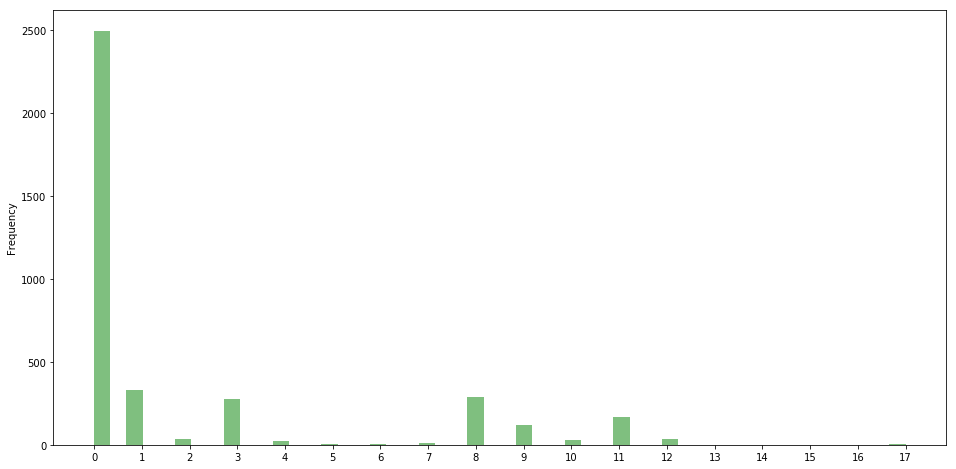

In [54]:
plt.figure(figsize=(16,8))
plt.xticks(range(50))
data_clean['Missing_num'].plot.hist(color='g', alpha=0.5, bins=50)
plt.show()

In [55]:
# keep 90% data
missing_threshold = 9
data_clean = data_clean[data_clean['Missing_num']<=missing_threshold].drop('Missing_num', axis = 1)

#### Step 03: Re-Encode Features

In [56]:
data_clean['host_response_rate'] = data_clean['host_response_rate'].map(lambda rate: np.float(rate[:-1]) / 100, na_action='ignore')
data_clean['host_acceptance_rate'] = data_clean['host_acceptance_rate'].map(lambda rate: np.float(rate[:-1]) / 100, na_action='ignore')

In [57]:
def oneHot(feat, data):
    print('Ecoding {} as one-hot..'.format(feat))
    cur_dummies = pd.get_dummies(data[feat], prefix=feat)
    data.drop(feat, axis=1, inplace=True)
    data = pd.concat([data, cur_dummies], axis=1)
    return data

In [58]:
feats = []
conts = []
columns = data_clean.columns
for feat in columns:
    if data_clean[feat].dtype == np.float:
        print('{} is a continous varibale'.format(feat))
        conts.append(feat)
    elif len(data_clean[feat].value_counts()) <= 5:
        data_clean = oneHot(feat, data_clean)
    else:
        feats.append(feat)

Ecoding host_response_time as one-hot..
host_response_rate is a continous varibale
host_acceptance_rate is a continous varibale
Ecoding host_is_superhost as one-hot..
Ecoding host_has_profile_pic as one-hot..
Ecoding host_identity_verified as one-hot..
Ecoding is_location_exact as one-hot..
Ecoding room_type as one-hot..
bathrooms is a continous varibale
bedrooms is a continous varibale
beds is a continous varibale
Ecoding bed_type as one-hot..
review_scores_rating is a continous varibale
review_scores_accuracy is a continous varibale
review_scores_cleanliness is a continous varibale
review_scores_checkin is a continous varibale
review_scores_communication is a continous varibale
review_scores_location is a continous varibale
review_scores_value is a continous varibale
Ecoding instant_bookable as one-hot..
Ecoding cancellation_policy as one-hot..
Ecoding require_guest_profile_picture as one-hot..
Ecoding require_guest_phone_verification as one-hot..
reviews_per_month is a continous var

In [59]:
print(conts)

['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [60]:
print(feats)

['host_since', 'host_location', 'host_neighbourhood', 'host_verifications', 'neighbourhood_group_cleansed', 'property_type', 'accommodates', 'amenities', 'price', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated', 'availability_365', 'number_of_reviews', 'calculated_host_listings_count']


In [61]:
data_clean['host_since'].head()

0    2011-08-11
1    2013-02-21
2    2014-06-12
4    2011-11-29
5    2010-12-25
Name: host_since, dtype: object

In [62]:
data_clean['host_since'] = data_clean['host_since'].map(lambda date: 2015 - int(date[:4]), na_action='ignore')

In [63]:
data_clean['host_since'].value_counts()

0    869
1    851
2    753
3    522
4    381
5    143
6     63
7      4
Name: host_since, dtype: int64

In [64]:
data_clean = oneHot('host_since', data_clean)

Ecoding host_since as one-hot..


In [65]:
data_clean['host_location'].value_counts()

Seattle, Washington, United States                             3094
US                                                              204
Spokane, Washington, United States                               41
Kent, Washington, United States                                  34
Los Angeles, California, United States                           11
San Francisco, California, United States                         11
Mercer Island, Washington, United States                         10
Bellevue, Washington, United States                              10
Kirkland, Washington, United States                               8
New York, New York, United States                                 6
Sammamish, Washington, United States                              5
Seattle                                                           5
Vashon, Washington, United States                                 5
Shoreline, Washington, United States                              4
Tucson, Arizona, United States                  

In [66]:
data_clean = drop(data_clean, 'host_location')

Dropping host_location...


In [67]:
data_clean['host_neighbourhood'].value_counts()

Capitol Hill                 384
Belltown                     250
Ballard                      199
Minor                        188
Queen Anne                   180
Fremont                      136
Wallingford                  127
Ravenna                       99
North Beacon Hill             97
Central Business District     93
First Hill                    80
Stevens                       77
Greenwood                     74
University District           74
Lower Queen Anne              70
Columbia City                 58
Green Lake                    53
North Admiral                 52
Magnolia                      51
Phinney Ridge                 50
Atlantic                      46
Leschi                        45
Mount Baker                   41
Maple Leaf                    38
Madrona                       38
Eastlake                      36
The Junction                  35
Roosevelt                     31
Bryant                        28
Pike Place Market             28
          

In [68]:
data_clean = drop(data_clean, 'host_neighbourhood')

Dropping host_neighbourhood...


In [69]:
data_clean['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    740
Capitol Hill           528
Downtown               511
Central Area           355
Queen Anne             280
Ballard                216
West Seattle           190
Rainier Valley         148
University District    115
Beacon Hill            114
Cascade                 74
Northgate               73
Delridge                72
Lake City               61
Magnolia                57
Seward Park             42
Interbay                10
Name: neighbourhood_group_cleansed, dtype: int64

In [70]:
data_clean = oneHot('neighbourhood_group_cleansed', data_clean)

Ecoding neighbourhood_group_cleansed as one-hot..


In [71]:
data_clean['property_type'].value_counts()

House              1635
Apartment          1606
Townhouse           108
Condominium          85
Loft                 36
Bed & Breakfast      31
Other                22
Cabin                21
Bungalow             13
Camper/RV            11
Boat                  6
Tent                  4
Dorm                  2
Chalet                2
Treehouse             2
Yurt                  1
Name: property_type, dtype: int64

In [72]:
data_clean = oneHot('property_type', data_clean)

Ecoding property_type as one-hot..


In [73]:
data_clean['calendar_updated'].value_counts()

today            690
2 weeks ago      332
3 weeks ago      295
2 months ago     243
a week ago       240
yesterday        223
4 weeks ago      204
3 months ago     195
3 days ago       160
5 weeks ago      145
4 days ago       142
5 days ago       130
6 weeks ago      112
4 months ago     112
2 days ago        94
5 months ago      76
7 weeks ago       57
6 days ago        27
1 week ago        26
6 months ago      24
7 months ago      18
never             14
8 months ago       9
9 months ago       5
10 months ago      5
11 months ago      2
12 months ago      2
30 months ago      1
22 months ago      1
13 months ago      1
14 months ago      1
Name: calendar_updated, dtype: int64

In [74]:
data_clean = drop(data_clean, 'calendar_updated')

Dropping calendar_updated...
